In [47]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score


## Load csv file

In [17]:
data=pd.read_csv('label1.csv')
data

,user_id,tweet_body,label
0,2657927260,Share Your Art NFT,0
1,1441479050388770000,I wanna buy NFT,0
2,1462770970301760000,I wanna buy your art NFT,0
3,1353384573435050000,BREAKING BlackRock has filed the S1 prospectus...,0
4,1432012870821100000,Official Announcement\n\nMicro3io is honored t...,0
...,...,...,...
619,1014141614,50 in 2 hours \n\nRT Follow Nik95247423 RT L...,1
620,1635230552214170000,Drop your NFTS \n\nlike\nRetweet\nMaybe Follow...,1
621,3185716686,Press to push Bitcoin above 38k,1
622,336348053,Who never got a DeFi ape\n\nGiving some away s...,1


In [18]:
data.columns

Index(['user_id', 'tweet_body', 'label'], dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     624 non-null    int64 
 1   tweet_body  624 non-null    object
 2   label       624 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 14.8+ KB


In [20]:
data.isna().sum()

user_id       0
tweet_body    0
label         0
dtype: int64

## Train model

In [21]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(data.tweet_body,data.label,test_size=0.25)

In [22]:
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [23]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

## Test model

In [35]:
content = ["Official Announcement \n Micro3io is honored that humanodeio has become a strategic partner \
           on Micro3s development journey \nAbout Micro3s Partner Humanode is a pioneering cryptobiometric \
           network using private facial recognition for Sybil resistance in web3 adopting a one person one \
           node one vote principle without KYC and offering Discord integration through BotBasher to prove your\
           account is backed by a unique user in under a minute \n Together lets reach new heights in development \n \
           Micro3 HUMANODE DeFi NFT NFTCollection"]

In [36]:
prediction = clf.predict(content)
print(prediction)

[0]


## Evaluation

In [38]:
y_pred = clf.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)


Accuracy score: 0.9423076923076923
Precision score: 0.9517241379310345
Recall score: 0.9857142857142858
F1 score: 0.968421052631579


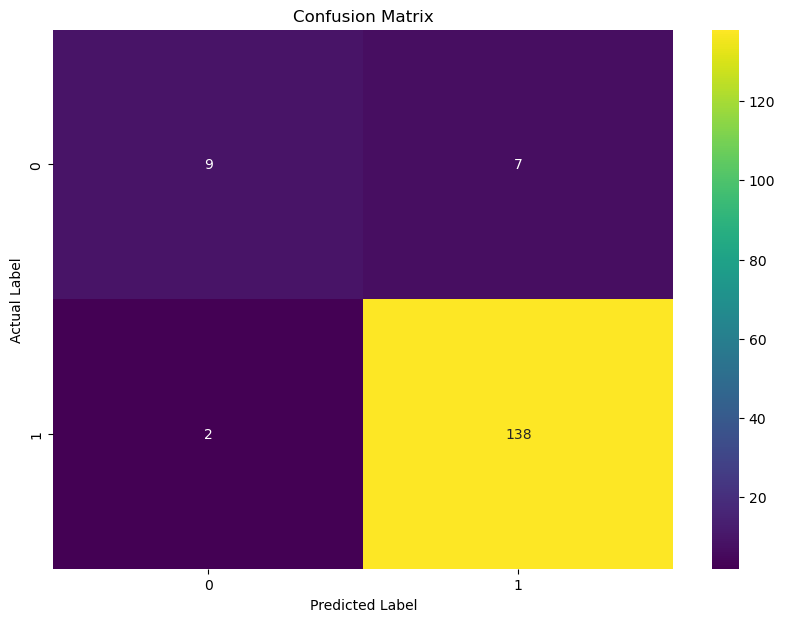

In [49]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap='viridis')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()